# Nonlinear program (NLP) - Task 4.4, 4.5, 4.6, 4.7 and 4.8 



### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, LinearConstraint

### Himmelblau problem

The himmelblau problem along with its gradient, hessian and inequality constraints seen in module 7, lecture 9D are defined

In [2]:
#Objective function and its derivatives
def himmelblau_objective(x):
    """Himmelblau function and its derivatives."""
    tmp1 = (x[0]**2 + x[1] - 11)
    tmp2 = (x[0] + x[1]**2 - 7)
    f = tmp1**2 + tmp2**2
    
    # The gradient
    df = np.array([
        4*x[0]*tmp1 + 2*tmp2,
        2*tmp1 + 4*x[1]*tmp2
    ])
    
    # The Hessian
    H = np.array([
        [4*tmp1 + 8*x[0]**2 + 2, 4*(x[0] + x[1])],
        [4*(x[0] + x[1]), 4*tmp2 + 8*x[1]**2 + 2]
    ])
    
    return f, df, H
#Inequality constraints and their derivatives
def inequality_constraints(x):
    
    c1 = (x[0] + 2)**2 - x[1]
    c2 = -4*x[0] + 10*x[1]
    c = np.array([c1, c2])
    
    # The Jacobian
    J = np.array([
        [2*(x[0] + 2), -1],
        [-4, 10]
    ])
    
    # Hessians of constraints
    H1 = np.array([[2, 0], [0, 0]])
    H2 = np.array([[0, 0], [0, 0]])
    H_list = [H1, H2]
    
    return c, J, H_list

### Plot of the Himmelblau problem with constraints from module 7 - lecture 9D 

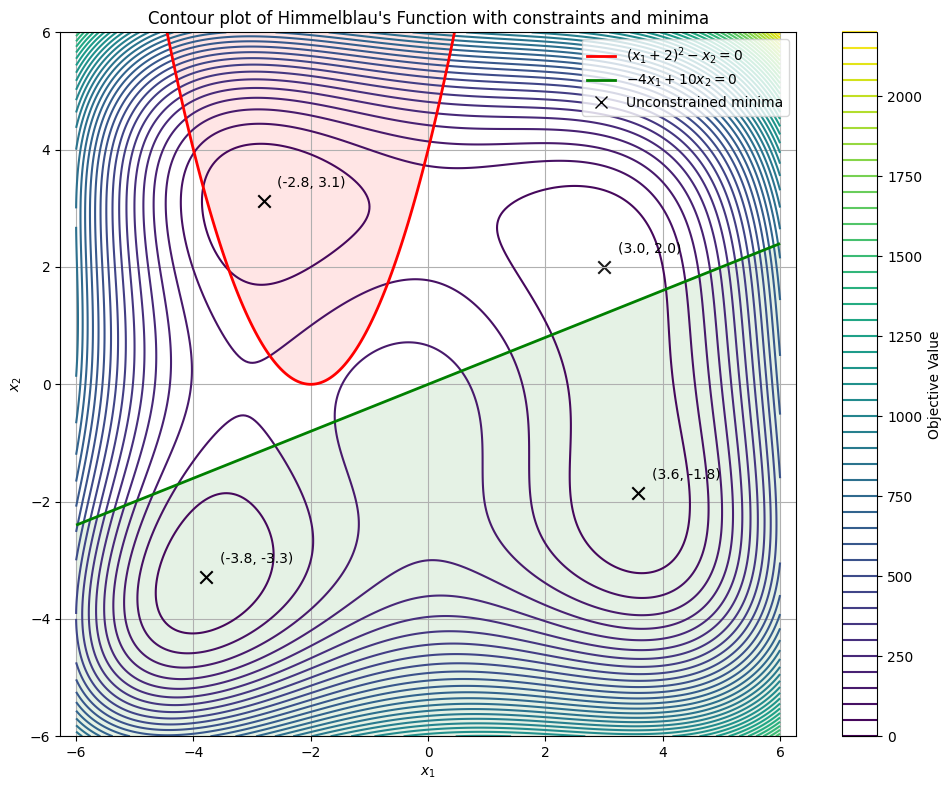

In [3]:
#mesh for the contour plot
x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Computes objective function values correctly
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = himmelblau_objective(point)[0]

# Contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, 50, cmap='viridis')
plt.colorbar(label='Objective Value')

# Plot constraints correctly
C1 = np.zeros_like(X)
C2 = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        C1[i, j] = (point[0] + 2)**2 - point[1]
        C2[i, j] = -4*point[0] + 10*point[1]

# constraint boundaries and fill
plt.contour(X, Y, C1, levels=[0], colors='r', linewidths=2, linestyles='solid')
plt.contour(X, Y, C2, levels=[0], colors='g', linewidths=2, linestyles='solid')
plt.contourf(X, Y, C1, levels=[-100, 0], colors='r', alpha=0.1)
plt.contourf(X, Y, C2, levels=[-100, 0], colors='g', alpha=0.1)

# Add local minima of Himmelblau function
minima = [
    [3.0, 2.0],
    [-2.805118, 3.131312],
    [-3.779310, -3.283186],
    [3.584428, -1.848126]
]
for m in minima:
    plt.scatter(m[0], m[1], color='black', s=80, marker='x')
    plt.annotate(f'({m[0]:.1f}, {m[1]:.1f})', (m[0], m[1]), 
                    xytext=(10, 10), textcoords='offset points')


# makes feasible area more clear
feasible_region = np.logical_and(C1 >= 0, C2 >= 0)
plt.contourf(X, Y, feasible_region.astype(float), levels=[0.5, 1.5], colors=['white'], alpha=0.1)

# more plot
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Contour plot of Himmelblau's Function with constraints and minima")
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color='r', linewidth=2),
    Line2D([0], [0], color='g', linewidth=2),
    Line2D([0], [0], color='black', marker='x', markersize=8, linestyle='none')
]
plt.legend(custom_lines, 
            ['$(x_1+2)^2-x_2 = 0$', '$-4x_1+10x_2 = 0$',
            'Unconstrained minima'])

plt.grid(True)
plt.axis('equal')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.tight_layout()
plt.show()

### Quick solution with CasADi (Inspired by the solution in Lecture09D)

In [4]:
from casadi import *

#symbolic variables
x1 = MX.sym('x1')
x2 = MX.sym('x2')
x = vertcat(x1, x2)

#objective function
t1 = x1**2 + x2 - 11
t2 = x1 + x2**2 - 7
f = t1**2 + t2**2

# constraints
c1 = (x1 + 2)**2 - x2
c2 = -4*x1 + 10*x2
g = vertcat(c1, c2)

#NLP
nlp = {'x': x, 'f': f, 'g': g}

#solver instance
solver = nlpsol('solver', 'ipopt', nlp)

#solving the problem with bounds and initial guess
sol = solver(
    x0=[0.0, 0.0],          #initial guess
    lbx=[-5, -5],           #lower bounds on x
    ubx=[5, 5],             #upper bounds on x
    lbg=[0, 0],             #lower bounds on g
    ubg=[1e8, 1e8]          #upper bounds on g (a very large number for "no upper bound")
)

print("Optimal x:", sol['x'])


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

### Helper functions for SQP algorithm

In [5]:
# Feasibility restoration functuoin - Projects point to the feasible region if it's outside
# not used later in the code - used for testing
def project_to_feasible(x):
    c, J, _ = inequality_constraints(x)
    if np.all(c >= 0):
        return x
    def distance_squared(z):
        return np.sum((z - x)**2)
    def distance_gradient(z):
        return 2 * (z - x)
    def constraint_function(z):
        return inequality_constraints(z)[0]
    def constraint_jacobian(z):
        return inequality_constraints(z)[1].T
    cons = {
        'type': 'ineq',
        'fun': constraint_function,
        'jac': constraint_jacobian
    }
    result = minimize(
        distance_squared,
        x,
        method='SLSQP',
        jac=distance_gradient,
        constraints=[cons],
        options={'ftol': 1e-8, 'disp': False}
    )
    return result.x

In [6]:
def line_search_with_feasibility(x, p, df, lam, obj_func, constraint_func, alpha=1.0, beta=0.8, c1=1e-4):
    f, _, _ = obj_func(x)
    directional_derivative = np.dot(df, p)
    
    alpha_max = alpha
    
    # Checks if step maintains feasibility
    def is_feasible(point):
        constraints, _, _ = constraint_func(point)
        return np.all(constraints >= -1e-6)
    
    # Finds largest alpha that maintains feasibility
    alpha_feasible = alpha_max
    for _ in range(10): 
        x_new = x + alpha_feasible * p
        if is_feasible(x_new):
            break
        alpha_feasible *= 0.5
        
    #if alpha_feasible < 1e-10:
        # If very small step project the point
    #    return 0.0, True  # Signal need for projection
    
    # regular line search from the feasible step
    alpha = alpha_feasible
    while True:
        x_new = x + alpha * p
        f_new, _, _ = obj_func(x_new)
        c_new, _, _ = constraint_func(x_new)
        
        # Merit function (Eq. 18.27) where objective + penalty for constraint violations
        penalty = 10.0  # Penalty parameter
        merit = f_new + penalty * np.sum(np.maximum(0, -c_new))
        merit_old = f + penalty * np.sum(np.maximum(0, -constraint_func(x)[0]))
        
        # Armijo condition for sufficient decrease (Eq. 18.28)
        if merit <= merit_old + c1 * alpha * directional_derivative or alpha < 1e-10:
            return alpha, False  # Return alpha and no need for projection
        
        alpha *= beta

### Plots function

In [7]:
def plot_contour_with_path(iterations, title="Himmelblau's Function with SQP Path"):
    #mesh for the contour plot
    x = np.linspace(-6, 6, 300)
    y = np.linspace(-6, 6, 300)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    # Computes objective function values correctly
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = himmelblau_objective(point)[0]

    # Contour plot
    plt.figure(figsize=(10, 8))
    contour = plt.contour(X, Y, Z, 50, cmap='viridis')
    plt.colorbar(label='Objective Value')

    # Plot constraints correctly and constraint boundaries and fill
    C1 = np.zeros_like(X)
    C2 = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            point = np.array([X[i, j], Y[i, j]])
            C1[i, j] = (point[0] + 2)**2 - point[1]
            C2[i, j] = -4*point[0] + 10*point[1]
    plt.contour(X, Y, C1, levels=[0], colors='r', linewidths=2, linestyles='solid')
    plt.contour(X, Y, C2, levels=[0], colors='g', linewidths=2, linestyles='solid')
    plt.contourf(X, Y, C1, levels=[-100, 0], colors='r', alpha=0.1)
    plt.contourf(X, Y, C2, levels=[-100, 0], colors='g', alpha=0.1)

    # Add local minima of Himmelblau function
    minima = [
        [3.0, 2.0],
        [-2.805118, 3.131312],
        [-3.779310, -3.283186],
        [3.584428, -1.848126]
    ]
    for m in minima:
        plt.scatter(m[0], m[1], color='black', s=80, marker='x')
        plt.annotate(f'({m[0]:.1f}, {m[1]:.1f})', (m[0], m[1]), 
                        xytext=(10, 10), textcoords='offset points')
        
    # Plot optimization path
    path = np.array(iterations)
    
    # Check feasibility of point in the path
    feasible_points = []
    for i, point in enumerate(path):
        c, _, _ = inequality_constraints(point)
        if np.all(c >= -1e-6):
            feasible_points.append(i)
    
    # Plot the path with different markers for feasible and infeasible points
    plt.plot(path[:, 0], path[:, 1], 'b-', linewidth=1.5)
    for i in range(0, len(path), max(1, len(path)//10)):
        plt.annotate(str(i), (path[i, 0], path[i, 1]), 
                    xytext=(5, 5), textcoords='offset points')
    
    # Mark feasible points in blue infeasible in red
    for i in range(len(path)):
        if i in feasible_points:
            plt.scatter(path[i, 0], path[i, 1], color='blue', s=40, marker='o')
        else:
            plt.scatter(path[i, 0], path[i, 1], color='red', s=40, marker='x')
    
    # Mark initial and final points
    plt.scatter(path[0, 0], path[0, 1], color='blue', s=100, marker='o', label='Initial point')
    plt.scatter(path[-1, 0], path[-1, 1], color='red', s=100, marker='*', label='Final solution')
    
    # makes feasible area more clear
    feasible_region = np.logical_and(C1 >= 0, C2 >= 0)
    plt.contourf(X, Y, feasible_region.astype(float), levels=[0.5, 1.5], colors=['white'], alpha=0.1)
    
    # more plot
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title, fontsize=20)
    from matplotlib.lines import Line2D
    custom_lines = [
        Line2D([0], [0], color='blue', marker='o', markersize=8, linestyle='-', linewidth=1.5),
        Line2D([0], [0], color='red', marker='*', markersize=10, linestyle='none'),
        Line2D([0], [0], color='r', linewidth=2),
        Line2D([0], [0], color='g', linewidth=2),
        Line2D([0], [0], color='black', marker='x', markersize=8, linestyle='none')
    ]
    plt.legend(custom_lines, 
               ['Optimization path', 'Final solution', 
                '$(x_1+2)^2-x_2 = 0$', '$-4x_1+10x_2 = 0$',
                'Unconstrained minima'])
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.tight_layout()
    plt.show()
    
    # Return final solution
    return path[-1]

### SQP algorithm

In [8]:
def sqp_line_search(x0, obj_func, constraint_func, max_iter=200, tol=1e-6, use_bfgs=False):
    """
    This implements Algorithm 18.3 (Line Search SQP) with the following components:
    -QP subproblem at each iteration to compute search direction
    -Line search with merit function for step acceptance
    -BFGS quasi-Newton updates with damping (Procedure 18.2)
    """
    x = x0.copy()
    # ensure initial point is feasible
    #x = project_to_feasible(x)
    n = len(x)
    iterations = [x.copy()]
    lam = np.ones(2)
    # Initialize BFGS
    if use_bfgs:
        B = np.eye(n)
    
    for iter in range(max_iter):
        f, df, H = obj_func(x)
        c, J, H_list = constraint_func(x)
        
        # Use BFGS approximation if specified
        if use_bfgs and iter > 0:
            H = B
        
        # Makes sure H is positive definite
        eigvals = np.linalg.eigvals(H)
        if np.any(eigvals <= 0):
            H += np.eye(n) * (abs(min(eigvals)) + 1e-6)
        
        # Constraint Jacobian is J.T
        # c + J.T @ p >= 0
        A = J.T
        lb = -c
        ub = np.inf * np.ones_like(c)
        
        qp_constraints = LinearConstraint(A, lb, ub)
        
        # Set up and solve QP subproblem with scipy
        def qp_objective(p):
            return 0.5 * p.T @ H @ p + df.T @ p
        
        def qp_gradient(p):
            return H @ p + df
        
        qp_result = minimize(
            qp_objective,
            np.zeros(n),
            method='trust-constr',
            jac=qp_gradient,
            hess=lambda p: H,
            constraints=[qp_constraints],
            options={'verbose': 0, 'gtol': 1e-6}
        )
        
        if not qp_result.success:
            print(f"QP solving failed at iteration {iter}")
            break
        
        p_sol = qp_result.x
        
        # extract dual variables
        if hasattr(qp_result, 'v') and qp_result.v is not None:
            lambda_new = qp_result.v[0] 
        else:
            lambda_new = lam
        
        # line search in Algorithm 18.3 - ignore needs_projection - was used to guarantee feasibility
        alpha, needs_projection = line_search_with_feasibility(x, p_sol, df, lambda_new, obj_func, constraint_func)
        x_new = x + alpha * p_sol
        
        # damped BFGS update (Procedure 18.2)
        if use_bfgs:
            s = x_new - x
            y = obj_func(x_new)[1] - df
            
            # update BFGS
            if np.linalg.norm(s) > 1e-10:
                Bs = B @ s
                sBs = s.T @ Bs
                #(Eq. 18.15)
                if s.T @ y < 0.2 * sBs:
                    theta = 0.8 * sBs / (sBs - s.T @ y)
                    y = theta * y + (1 - theta) * Bs
                    #BFGS update (Eq. 18.16)
                if s.T @ y > 1e-10:
                    B = B - np.outer(Bs, Bs) / sBs + np.outer(y, y) / (s.T @ y)
        
        # update Lagrange multipliers
        lam = lambda_new
        
        # Check convergence
        if np.linalg.norm(x_new - x) < tol:
            print(f"Converged in {iter+1} iterations.")
            break
        x = x_new
        iterations.append(x.copy())
    return x, iterations

### Primal Active set Algorithm for QP-solving (Taken from Module 06, lecture08)

In [10]:
def equality_qp_subproblem(H, g, A, b):
    n = H.shape[0]
    m = A.shape[1]

    KKT = np.block([
        [H, -A],
        [-A.T, np.zeros((m, m))]
    ])
    rhs = np.concatenate([-g, b])

    z = np.linalg.solve(KKT, rhs)
    x = z[:n]
    lamb = z[n:]
    return x, lamb


def qpsolver_active_set(H, g, A, b, x0):
    """
    Solve a convex QP using a primal active set algorithm.
    """
    tol = 1.0e-8
    tolLx = tol
    tolp = tol

    n, m = A.shape
    Wset = []
    IWset = list(range(m))
    lambda_full = np.zeros(m)
    x = x0.copy()

    # QP data
    gk = H @ x + g
    nablaxL = gk - A @ lambda_full
    c = A.T @ x + b  # c(x) = A' x + b >= 0

    # Check if the initial point is optimal
    KKT_stationarity = np.linalg.norm(nablaxL, np.inf) < tolLx
    KKT_conditions = KKT_stationarity  # Other conditions are satisfied

    # Main loop
    maxit = 100 * (n + m)
    it = 0
    while not KKT_conditions and it < maxit:
        it += 1

        # Solve equality constrained QP
        A_w = A[:, Wset] if Wset else np.zeros((n, 0))
        b_w = np.zeros(len(Wset))
        p, lambdaWset = equality_qp_subproblem(H, gk, A_w, b_w)

        if np.linalg.norm(p, np.inf) > tolp:  # p is non-zero
            # find binding constraint 
            alpha = 1.0
            idc = -1
            for i, idx in enumerate(IWset):
                pA = A[:, idx].T @ p
                if pA < 0.0:
                    alpha_pA = -c[idx] / pA
                    if alpha_pA < alpha:
                        alpha = alpha_pA
                        idc = i

            #take step, update data and working set
            x += alpha * p
            gk = H @ x + g
            c = A.T @ x + b
            if idc >= 0:
                Wset.append(IWset[idc])
                IWset.pop(idc)
        else:  #p is zero
            #Find minimum lambda
            idlambdaWset = -1
            minlambdaWset = 0.0
            for i, lam in enumerate(lambdaWset):
                if lam < minlambdaWset:
                    idlambdaWset = i
                    minlambdaWset = lam

            if idlambdaWset >= 0:  #Update the working set, x = x
                #If minimum lambda < 0, remove constraint from working set
                IWset.append(Wset[idlambdaWset])
                Wset.pop(idlambdaWset)
            else:  #Optimal solution found
                KKT_conditions = True
                xopt = x
                lambdaopt = np.zeros(m)
                for i, idx in enumerate(Wset):
                    lambdaopt[idx] = lambdaWset[i]
                return xopt, lambdaopt, Wset, it

    #If max iterations exceeded
    return None, None, None, it

### SQP with Primal Active Set implementation

In [11]:
def sqp_with_active_set(x0, obj_func, constraint_func, max_iter=200, tol=1e-6, use_bfgs=False):
    """SQP algorithm using a primal active set method for QP subproblems."""
    x = x0.copy()
    
    n = len(x)
    iterations = [x.copy()]
    
    # Initiate Lagrange multipliers
    num_constraints = len(constraint_func(x)[0])
    #lam = np.zeros(num_constraints)
    
    # Initiate BFGS
    if use_bfgs:
        B = np.eye(n)
    
    for iter in range(max_iter):
        f, df, H = obj_func(x)
        c, J, H_list = constraint_func(x)
        
        # Use BFGS approximation if specified
        if use_bfgs and iter > 0:
            H = B
        
        # Make sure H is positive definite for the QP solver
        eigvals = np.linalg.eigvals(H)
        if np.any(eigvals <= 0):
            H += np.eye(n) * (abs(min(eigvals)) + 1e-6)
        
        # Set up QP subproblem for the active set solver
        # The QP problem is:
        # min 0.5*p'*H*p + df'*p
        # s.t. J.T*p + c >= 0
        # Convert to standard form for active set method:
        # min 0.5*p'*H*p + df'*p
        # s.t. A'*p + b >= 0  where A = -J, b = c
        
        A = -J  # Note the negative sign to convert to A'*p + b >= 0 form
        b = c
        
        # Solve QP subproblem using the active set method
        p_sol, lambda_qp, active_set, qp_iter = qpsolver_active_set(H, df, A, b, np.zeros(n))
        
        if p_sol is None:
            print(f"QP solver failed at iteration {iter}")
            # Try a small step in the steepest descent direction
            p_sol = -0.01 * df / np.linalg.norm(df)
        
        # Extract Lagrange multipliers for the constraints
        lambda_new = np.zeros(num_constraints)
        if lambda_qp is not None:
            lambda_new = lambda_qp
        
        # Line search with feasibility check
        alpha, needs_projection = line_search_with_feasibility(x, p_sol, df, lambda_new, obj_func, constraint_func)
        x_new = x + alpha * p_sol
        
        # make sure new point is feasible
        #if not np.all(constraint_func(x_new)[0] >= -1e-6):
        #    x_new = project_to_feasible(x_new)
        
        # Update BFGS approximation
        if use_bfgs:
            s = x_new - x
            y = obj_func(x_new)[1] - df
            
            # Only update BFGS if we have a meaningful step
            if np.linalg.norm(s) > 1e-10:
                # Compute BFGS update with damping
                Bs = B @ s
                sBs = s.T @ Bs
                
                if s.T @ y < 0.2 * sBs:
                    theta = 0.8 * sBs / (sBs - s.T @ y)
                    y = theta * y + (1 - theta) * Bs
                
                if s.T @ y > 1e-10:
                    B = B - np.outer(Bs, Bs) / sBs + np.outer(y, y) / (s.T @ y)
        #lam = lambda_new
        # Check convergence
        if np.linalg.norm(x_new - x) < tol:
            print(f"Converged in {iter+1} iterations.")
            break
        
        x = x_new
        iterations.append(x.copy())
        
        # Print progress
        print(f"Iteration {iter+1}: f={f:.6f}, |p|={np.linalg.norm(p_sol):.6f}, QP iters={qp_iter}")
    return x, iterations

### Run with input

Running SQP with analytical Hessian...
Converged in 9 iterations.
Solution with analytical Hessian: [2.99999584 2.00002777]
Objective value: 1.1442544904825227e-08
Constraints: [22.99993065  8.00029435]


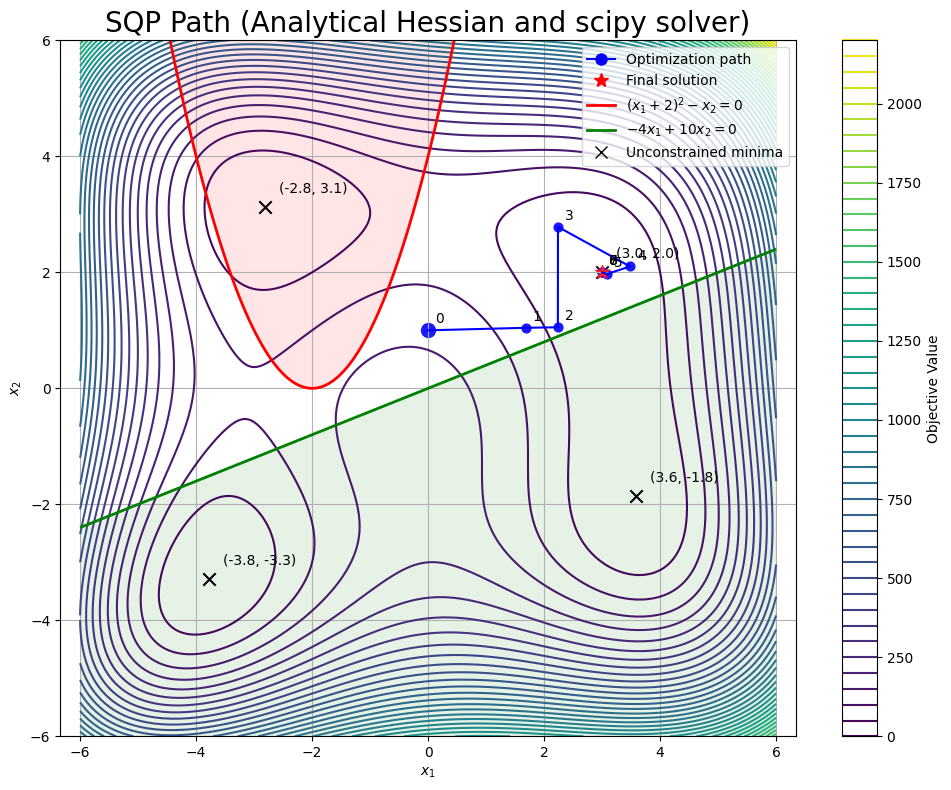


Running SQP with BFGS approximation...
Converged in 11 iterations.
Solution with BFGS approximation: [2.99999588 2.0000273 ]
Objective value: 1.1052074856272661e-08
Constraints: [22.99993153  8.0002895 ]


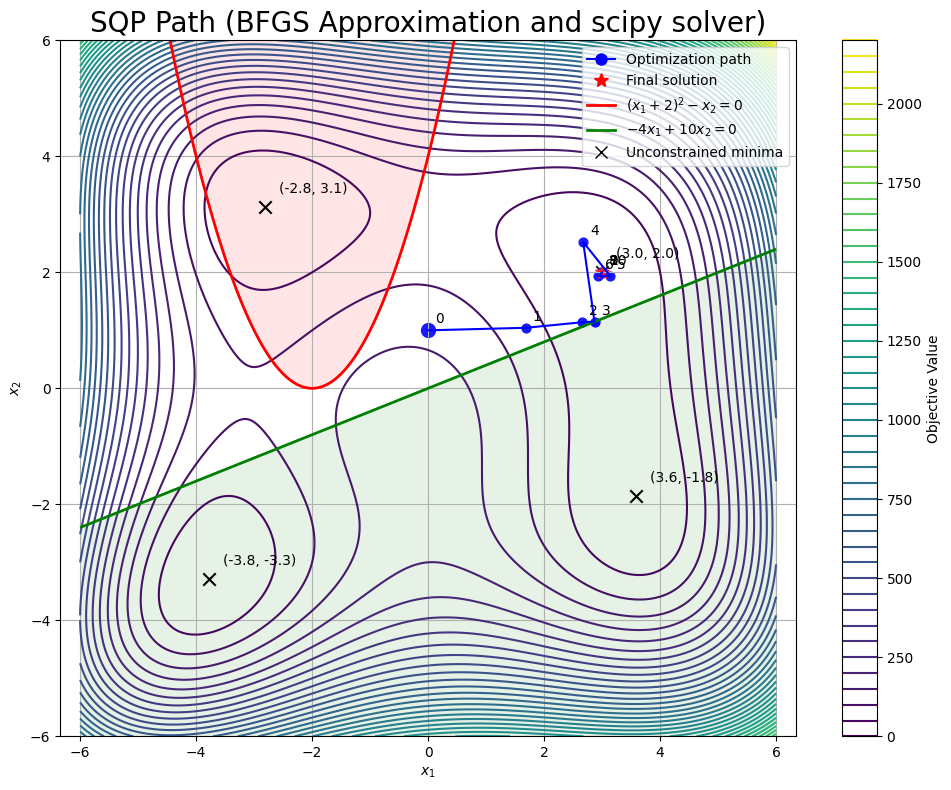

array([2.99999588, 2.0000273 ])

In [12]:
x0 = np.array([0.0, 1.0])

# Run SQP with analytical Hessian
print("Running SQP with analytical Hessian...")
x_sol, iterations = sqp_line_search(x0, himmelblau_objective, inequality_constraints, use_bfgs=False)
print(f"Solution with analytical Hessian: {x_sol}")
obj_value = himmelblau_objective(x_sol)[0]
constraints_val = inequality_constraints(x_sol)[0]
print(f"Objective value: {obj_value}")
print(f"Constraints: {constraints_val}")
plot_contour_with_path(iterations, title="SQP Path (Analytical Hessian and scipy solver)")

# Run SQP with BFGS approximation
print("\nRunning SQP with BFGS approximation...")
x_sol_bfgs, iterations_bfgs = sqp_line_search(x0, himmelblau_objective, inequality_constraints, use_bfgs=True)
print(f"Solution with BFGS approximation: {x_sol_bfgs}")
obj_value_bfgs = himmelblau_objective(x_sol_bfgs)[0]
constraints_val_bfgs = inequality_constraints(x_sol_bfgs)[0]
print(f"Objective value: {obj_value_bfgs}")
print(f"Constraints: {constraints_val_bfgs}")
plot_contour_with_path(iterations_bfgs, title="SQP Path (BFGS Approximation and scipy solver)")

Running SQP with analytical Hessian...
Iteration 1: f=155.812500, |p|=1.661392, QP iters=3
Iteration 2: f=73.614078, |p|=2.154718, QP iters=3
Iteration 3: f=12.266584, |p|=0.438349, QP iters=2
Iteration 4: f=0.420212, |p|=0.122598, QP iters=2
Iteration 5: f=0.001166, |p|=0.005977, QP iters=2
Iteration 6: f=0.000000, |p|=0.000021, QP iters=2
Converged in 7 iterations.
Solution with analytical Hessian: [3. 2.]
Objective value: 1.039241834552687e-18
Constraints: [23.  8.]


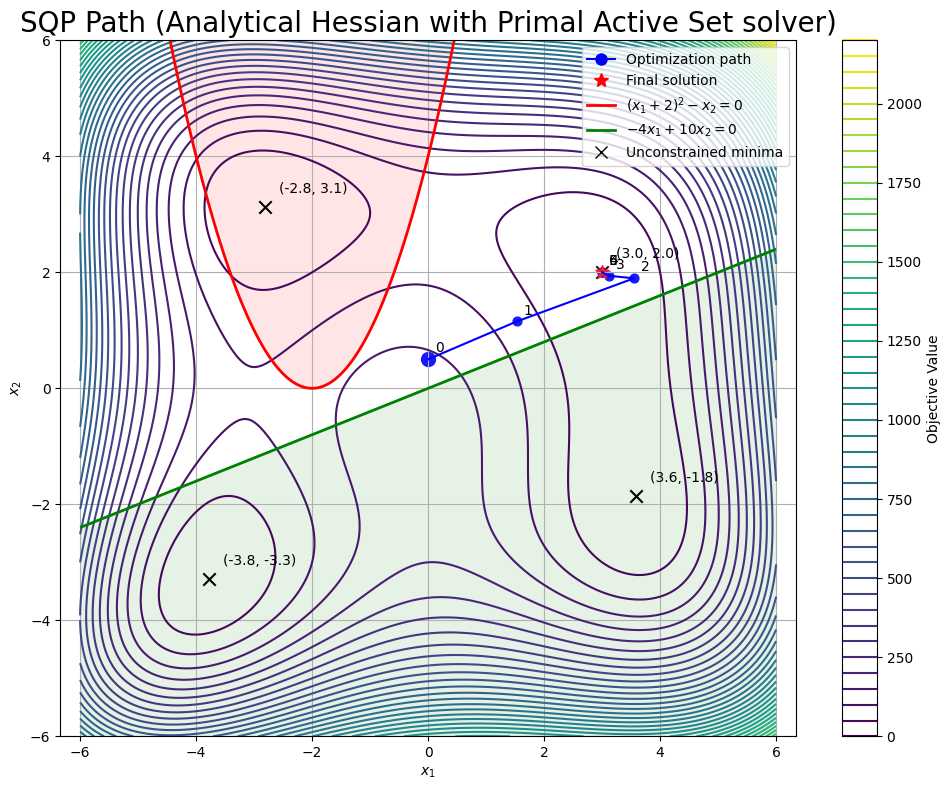


Running SQP with BFGS approximation...
Iteration 1: f=155.812500, |p|=1.661392, QP iters=3
Iteration 2: f=73.614078, |p|=2.154718, QP iters=3
Iteration 3: f=12.266584, |p|=1.277574, QP iters=3
Iteration 4: f=11.410992, |p|=0.978494, QP iters=2
Iteration 5: f=5.544835, |p|=1.605740, QP iters=3
Iteration 6: f=5.496879, |p|=0.412009, QP iters=3
Iteration 7: f=0.508770, |p|=0.425913, QP iters=2
Iteration 8: f=0.327243, |p|=0.165289, QP iters=2
Iteration 9: f=0.007504, |p|=0.021056, QP iters=2
Iteration 10: f=0.000098, |p|=0.002783, QP iters=2
Iteration 11: f=0.000000, |p|=0.000063, QP iters=2
Iteration 12: f=0.000000, |p|=0.000011, QP iters=2
Converged in 13 iterations.
Solution with BFGS approximation: [3.00000001 1.99999999]
Objective value: 1.870631667334916e-15
Constraints: [23.00000007  7.99999987]


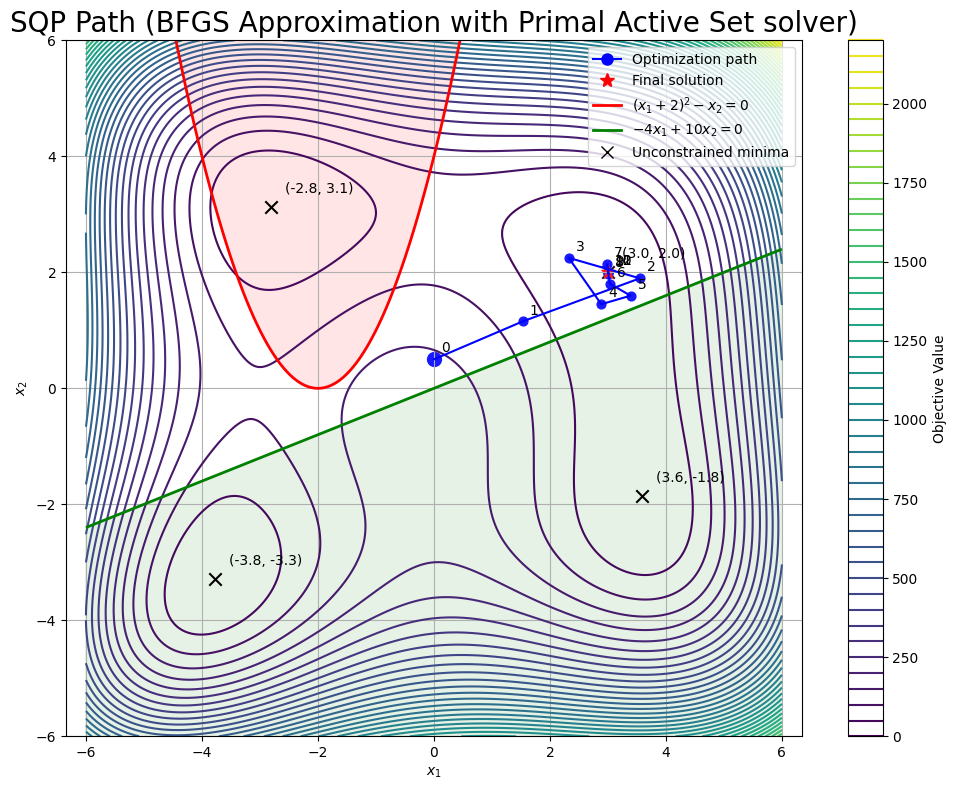

array([3.00000001, 1.99999999])

In [13]:

x0 = np.array([0.0, 0.5])

# Run SQP with analytical Hessian
print("Running SQP with analytical Hessian...")
x_sol, iterations = sqp_with_active_set(x0, himmelblau_objective, inequality_constraints, use_bfgs=False)
print(f"Solution with analytical Hessian: {x_sol}")
obj_value = himmelblau_objective(x_sol)[0]
constraints_val = inequality_constraints(x_sol)[0]
print(f"Objective value: {obj_value}")
print(f"Constraints: {constraints_val}")
plot_contour_with_path(iterations, title="SQP Path (Analytical Hessian with Primal Active Set solver)")

# Run SQP with BFGS approximation
print("\nRunning SQP with BFGS approximation...")
x_sol_bfgs, iterations_bfgs = sqp_with_active_set(x0, himmelblau_objective, inequality_constraints, use_bfgs=True)
print(f"Solution with BFGS approximation: {x_sol_bfgs}")
obj_value_bfgs = himmelblau_objective(x_sol_bfgs)[0]
constraints_val_bfgs = inequality_constraints(x_sol_bfgs)[0]
print(f"Objective value: {obj_value_bfgs}")
print(f"Constraints: {constraints_val_bfgs}")
plot_contour_with_path(iterations_bfgs, title="SQP Path (BFGS Approximation with Primal Active Set solver)")

### Trust Region Implementation

In [14]:
def solve_trust_region_qp(H, g, A, b, delta):
    """
    Solve QP with trust region constraint using active set method.
    This sets up the trust region subproblem (18.43:
    """
    n = len(g)
    
    # Define the augmented problem with trust region
    def qp_objective(p):
        return 0.5 * p.T @ H @ p + g.T @ p
    
    # the trust-region bound (18.43d)
    trust_region_constraint = {
        'type': 'ineq',
        'fun': lambda p: delta - np.linalg.norm(p),
        'jac': lambda p: -p / (np.linalg.norm(p) + 1e-10)
    }
    
    # linearized constraints (18.43b, 18.43c)
    linear_constraints = {
        'type': 'ineq',
        'fun': lambda p: A.T @ p + b,
        'jac': lambda p: A.T
    }
    
    # just using scipy's solver
    result = minimize(
        qp_objective,
        np.zeros(n),
        method='SLSQP',
        jac=lambda p: H @ p + g,
        constraints=[trust_region_constraint, linear_constraints],
        options={'ftol': 1e-8}
    )
    
    return result.x, result.fun

In [15]:
def compute_ratio(x_k, p_k, f_k, df_k, H_k, f_new, constraints_k, constraints_new):
    """
    Compute ratio of actual to predicted reduction.
    This calculates the ratio (18.48):
    (actual improvement)/(predicted improvement)
    """
    # reduction in objective
    actual_reduction = f_k - f_new
    
    # Predicted reduction from quadratic model (18.47)
    # This is what our model thinks will happen
    model_reduction = -(df_k.T @ p_k + 0.5 * p_k.T @ H_k @ p_k)
    
    # Add penalty for constraint violations
    # simpler approach than the structured merit functions in the theory
    penalty = 1000.0  # High penalty parameter
    constraint_viol_k = sum(max(0, -c) for c in constraints_k)
    constraint_viol_new = sum(max(0, -c) for c in constraints_new)
    
    # Include constraint improvement in the ratio
    # adjusts the actual reduction to account for constraint changes
    actual_reduction += penalty * (constraint_viol_k - constraint_viol_new)
    
    # Avoid division by zero
    if abs(model_reduction) < 1e-10:
        return 0.0 if abs(actual_reduction) < 1e-10 else np.sign(actual_reduction) * np.inf

    # Return ratio
    return actual_reduction / model_reduction

In [16]:
def update_trust_region_radius(delta_k, ratio, p_k):
    """
    Update trust region radius based on agreement ratio.
    This follows the strategy in Algorithm 18.4
    """
    norm_p = np.linalg.norm(p_k)
    
    if ratio < 0.25:
        # Poor agreement - shrink the trust region
        return max(0.1 * delta_k, 0.1 * norm_p)
    elif ratio > 0.75 and abs(norm_p - delta_k) < 1e-10:
        # Good agreement and we're hitting the boundary - expand
        # Double the radius, but cap at 10.0
        return min(2.0 * delta_k, 10.0)
    else:
        # Keep the same radius (things are working okay)
        return delta_k

### Main Trust Region SQP algorithm

In [17]:
def sqp_trust_region(x0, obj_func, constraint_func, max_iter=200, tol=1e-5, delta_0=1.0, use_bfgs=False):
    """
    This implements a trust-region SQP similar to Algorithm 18.4,
    with some elements from the Sl1QP approach (Section 18.5).
    The idea is to limit step size with a trust region and evaluate
    model quality with the ratio test.
    """
    x = x0.copy()
    n = len(x)
    iterations = [x.copy()]
    num_constraints = len(constraint_func(x)[0])
    lam = np.zeros(num_constraints)
    
    # Initiate trust region radius
    delta = delta_0
    
    # Initiate BFGS
    if use_bfgs:
        B = np.eye(n)
    
    for iter in range(max_iter):
        f, df, H = obj_func(x)
        c, J, H_list = constraint_func(x)
        
        # Use BFGS approximation if specified
        if use_bfgs and iter > 0:
            H = B 
        
        # Make sure H is positive definite
        eigvals = np.linalg.eigvals(H)
        if np.any(eigvals <= 0):
            H += np.eye(n) * (abs(min(eigvals)) + 1e-6)
        
        # Convert constraints and solve trust region QP subproblem
        A = -J 
        b = c
        p_sol, model_value = solve_trust_region_qp(H, df, A, b, delta)
        
        # Compute new point and evaluate at new point
        x_new = x + p_sol 
        f_new, df_new, _ = obj_func(x_new)
        c_new, _, _ = constraint_func(x_new)
        
        # Compute ratio of actual to predicted reduction (18.48)
        ratio = compute_ratio(x, p_sol, f, df, H, f_new, c, c_new)
        
        # Update trust region radius (18.4)
        delta = update_trust_region_radius(delta, ratio, p_sol)
        
        # Determine whether to accept the step
        if ratio > 0.1:  
            if use_bfgs:
                s = p_sol
                y = df_new - df
                
                # Only update BFGS if meaningful step
                if np.linalg.norm(s) > 1e-3:
                    # Compute BFGS update with damping
                    Bs = B @ s
                    sBs = s.T @ Bs
                    if s.T @ y < 0.2 * sBs:
                        theta = 0.8 * sBs / (sBs - s.T @ y)
                        y = theta * y + (1-theta) * Bs
                    
                    # BFGS update
                    if s.T @ y > 1e-10:
                        B = B - np.outer(Bs, Bs) / sBs + np.outer(y, y) / (s.T @ y)
            
            x = x_new
            iterations.append(x.copy())
            
            # Check convergence
            if np.linalg.norm(p_sol) < tol:
                print(f"Converged in {iter+1} iterations.")
                break
        else:
            print(f"Iteration {iter+1}: Step rejected, trust region radius = {delta:.6f}")
        print(f"Iteration {iter+1}: f={f:.6f}, |p|={np.linalg.norm(p_sol):.6f}, ratio={ratio:.6f}, delta={delta:.6f}")
    
    return x, iterations

Running SQP with analytical Hessian...
Iteration 1: f=136.000000, |p|=1.000000, ratio=1.435491, delta=2.000000
Iteration 2: f=88.253149, |p|=1.520664, ratio=1.827249, delta=2.000000
Iteration 3: f=31.238538, |p|=1.423242, ratio=0.537283, delta=2.000000
Iteration 4: f=5.275510, |p|=0.348323, ratio=1.078148, delta=2.000000
Iteration 5: f=0.118895, |p|=0.080049, ratio=1.036276, delta=2.000000
Iteration 6: f=0.000407, |p|=0.005449, ratio=1.002745, delta=2.000000
Iteration 7: f=0.000000, |p|=0.000016, ratio=1.000007, delta=2.000000
Converged in 8 iterations.
Solution with analytical Hessian: [2.99999895 2.00000487]
Objective value: 3.417689671571746e-10
Constraints: [22.99998458  8.00005293]


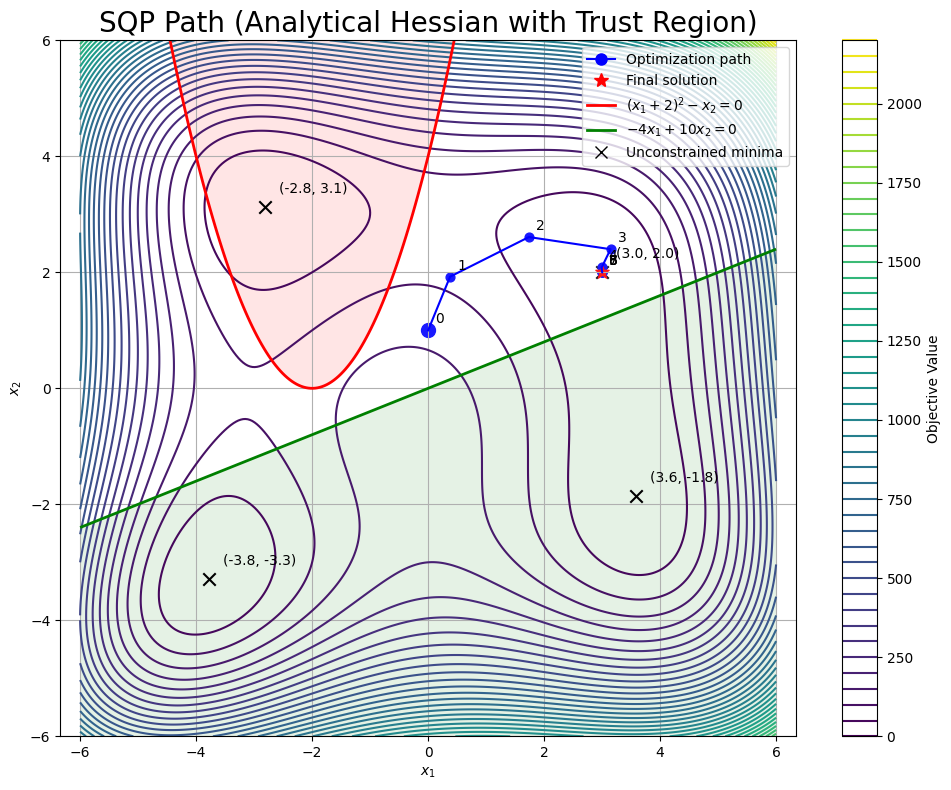


Running SQP with BFGS approximation...
Iteration 1: f=136.000000, |p|=1.000000, ratio=1.435491, delta=2.000000
Iteration 2: Step rejected, trust region radius = 0.200000
Iteration 2: f=88.253149, |p|=2.000000, ratio=-0.102532, delta=0.200000
Iteration 3: f=88.253149, |p|=0.200000, ratio=0.955439, delta=0.400000
Iteration 4: f=79.709720, |p|=0.400000, ratio=0.965246, delta=0.800000
Iteration 5: f=65.407608, |p|=0.800000, ratio=0.969259, delta=0.800000
Iteration 6: f=45.495617, |p|=0.800000, ratio=1.022713, delta=1.600000
Iteration 7: Step rejected, trust region radius = 0.160000
Iteration 7: f=28.379975, |p|=1.600000, ratio=-1.122508, delta=0.160000
Iteration 8: f=28.379975, |p|=0.160000, ratio=1.149227, delta=0.320000
Iteration 9: f=21.563804, |p|=0.320000, ratio=1.008327, delta=0.640000
Iteration 10: f=10.900725, |p|=0.640000, ratio=0.737401, delta=0.640000
Iteration 11: Step rejected, trust region radius = 0.064000
Iteration 11: f=2.750521, |p|=0.610240, ratio=0.097762, delta=0.0640

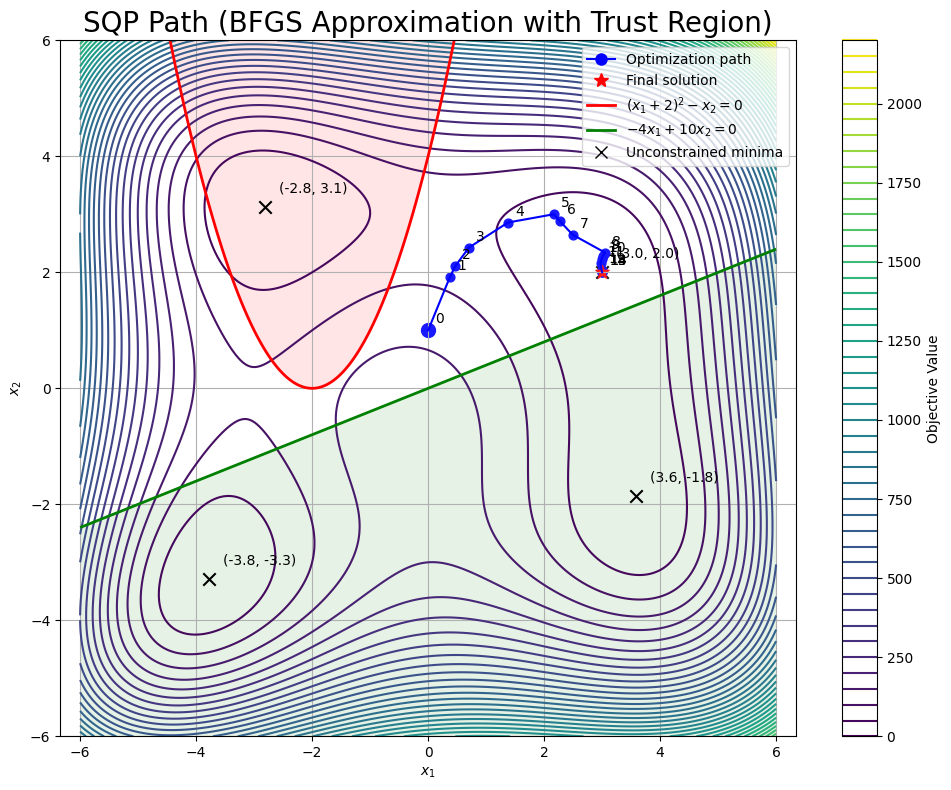

array([3.00000106, 2.00000021])

In [18]:
x0 = np.array([0.0, 1.0])

# Run SQP with analytical Hessian
print("Running SQP with analytical Hessian...")
x_sol, iterations = sqp_trust_region(x0, himmelblau_objective, inequality_constraints, use_bfgs=False)
print(f"Solution with analytical Hessian: {x_sol}")
obj_value = himmelblau_objective(x_sol)[0]
constraints_val = inequality_constraints(x_sol)[0]
print(f"Objective value: {obj_value}")
print(f"Constraints: {constraints_val}")
plot_contour_with_path(iterations, title="SQP Path (Analytical Hessian with Trust Region)")

# Run SQP with BFGS approximation
print("\nRunning SQP with BFGS approximation...")
x_sol_bfgs, iterations_bfgs = sqp_trust_region(x0, himmelblau_objective, inequality_constraints, use_bfgs=True)
print(f"Solution with BFGS approximation: {x_sol_bfgs}")
obj_value_bfgs = himmelblau_objective(x_sol_bfgs)[0]
constraints_val_bfgs = inequality_constraints(x_sol_bfgs)[0]
print(f"Objective value: {obj_value_bfgs}")
print(f"Constraints: {constraints_val_bfgs}")
plot_contour_with_path(iterations_bfgs, title="SQP Path (BFGS Approximation with Trust Region)")

# 4.8

In [19]:
def rosenbrock_objective(x):
    # Function value
    f = 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
    
    # Gradient
    df = np.array([
        -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]),
        200 * (x[1] - x[0]**2)
    ])
    
    # Hessian
    H = np.array([
        [1200 * x[0]**2 - 400 * x[1] + 2, -400 * x[0]],
        [-400 * x[0], 200]
    ])
    
    return f, df, H

def rosenbrock_constraints(x):
    # Constraint values: g(x) >= 0 format
    c1 = 3 - (x[0]**2 + x[1]**2)  # Circle constraint
    c2 = x[0] + x[1]               # Linear constraint
    c = np.array([c1, c2])
    
    # Constraint Jacobian
    J = np.array([
        [-2*x[0], -2*x[1]],
        [1, 1]
    ]).T  #transpose to get correct shape
    
    # Hessians of constraints
    H1 = np.array([[-2, 0], [0, -2]]) 
    H2 = np.array([[0, 0], [0, 0]])
    H_list = [H1, H2]
    
    return c, J, H_list

In [21]:
def plot_rosenbrock_with_path(iterations, title="Rosenbrock Function with SQP Path"):
    # Mesh for the contour plot
    x = np.linspace(-2, 2.5, 300)
    y = np.linspace(-2, 2.5, 300)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    
    # Compute Rosenbrock function values
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = rosenbrock_objective(point)[0]
    
    # Contour plot
    plt.figure(figsize=(10, 8))
    contour = plt.contour(X, Y, Z, 50, cmap='viridis')
    plt.colorbar(label='Objective Value')
    
    # Plot constraints correctly
    C1 = np.zeros_like(X)  # Circle constraint
    C2 = np.zeros_like(X)  # Linear constraint
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            point = np.array([X[i, j], Y[i, j]])
            C1[i, j] = 3 - (point[0]**2 + point[1]**2)
            C2[i, j] = point[0] + point[1]
    
    # Constraint boundaries and fill
    plt.contour(X, Y, C1, levels=[0], colors='r', linewidths=2, linestyles='solid')
    plt.contour(X, Y, C2, levels=[0], colors='g', linewidths=2, linestyles='solid')
    plt.contourf(X, Y, C1, levels=[-100, 0], colors='r', alpha=0.1)
    plt.contourf(X, Y, C2, levels=[-100, 0], colors='g', alpha=0.1)
    
    # Add known solution (1,1)
    known_solution = [1.0, 1.0]
    plt.scatter(known_solution[0], known_solution[1], color='black', s=80, marker='x')
    plt.annotate(f'({known_solution[0]:.1f}, {known_solution[1]:.1f})', (known_solution[0], known_solution[1]), 
                    xytext=(10, 10), textcoords='offset points')
    
    # Plot optimization path
    path = np.array(iterations)
    
    # Check feasibility of each point in the path
    feasible_points = []
    for i, point in enumerate(path):
        c1 = 3 - (point[0]**2 + point[1]**2)
        c2 = point[0] + point[1]
        if c1 >= -1e-6 and c2 >= -1e-6:
            feasible_points.append(i)
    
    # Plot the path with different markers for feasible and infeasible points
    plt.plot(path[:, 0], path[:, 1], 'b-', linewidth=1.5)
    for i in range(0, len(path), max(1, len(path)//10)):
        plt.annotate(str(i), (path[i, 0], path[i, 1]), 
                    xytext=(5, 5), textcoords='offset points')
    
    # Mark feasible points in blue, infeasible in red
    for i in range(len(path)):
        if i in feasible_points:
            plt.scatter(path[i, 0], path[i, 1], color='blue', s=40, marker='o')
        else:
            plt.scatter(path[i, 0], path[i, 1], color='red', s=40, marker='x')
    
    # Mark initial and final points
    plt.scatter(path[0, 0], path[0, 1], color='blue', s=100, marker='o', label='Initial point')
    plt.scatter(path[-1, 0], path[-1, 1], color='red', s=100, marker='*', label='Final solution')
    
    # Make feasible area more clear
    feasible_region = np.logical_and(C1 >= 0, C2 >= 0)
    plt.contourf(X, Y, feasible_region.astype(float), levels=[0.5, 1.5], colors=['white'], alpha=0.1)
    
    # Draw circle with radius sqrt(3)
    circle = plt.Circle((0, 0), np.sqrt(3), fill=False, color='red', linestyle='-', linewidth=1)
    plt.gca().add_patch(circle)
    
    # More plot formatting
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title, fontsize=20)
    from matplotlib.lines import Line2D
    custom_lines = [
        Line2D([0], [0], color='blue', marker='o', markersize=8, linestyle='-', linewidth=1.5),
        Line2D([0], [0], color='red', marker='*', markersize=10, linestyle='none'),
        Line2D([0], [0], color='r', linewidth=2),
        Line2D([0], [0], color='g', linewidth=2),
        Line2D([0], [0], color='black', marker='x', markersize=8, linestyle='none')
    ]
    plt.legend(custom_lines, 
               ['Optimization path', 'Final solution', 
                '$x_1^2+x_2^2 = 3$', '$x_1+x_2 = 0$',
                'Known solution (1,1)'])
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(-2, 2.5)
    plt.ylim(-2, 2.5)
    plt.tight_layout()
    plt.show()
    
    # Return final solution
    return path[-1]

Converged in 32 iterations.


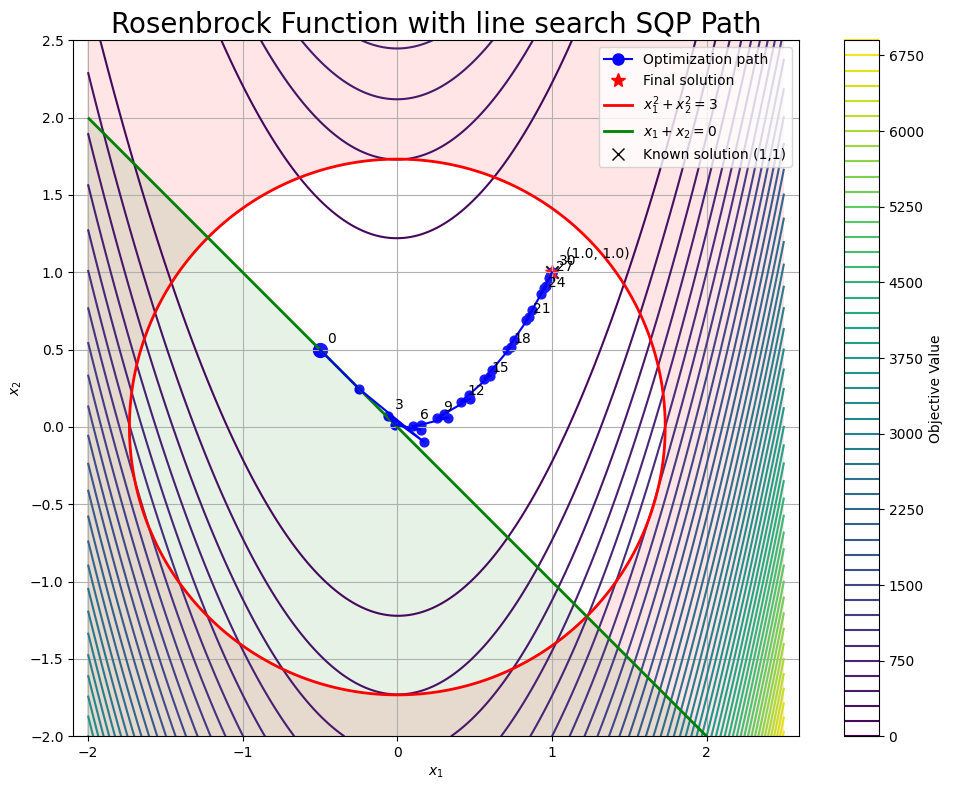

In [22]:
#run with line search SQP
x0 = np.array([-0.5, 0.5])
x_optimal, iterations = sqp_line_search(x0, rosenbrock_objective, rosenbrock_constraints, 
                                       max_iter=100, tol=1e-6, use_bfgs=True)
iterations_array = np.array(iterations)
plot = plot_rosenbrock_with_path(iterations_array, title="Rosenbrock Function with line search SQP Path")

Iteration 1: f=26.000000, |p|=0.798525, ratio=1.077888, delta=1.000000
Iteration 2: Step rejected, trust region radius = 0.100000
Iteration 2: f=10.833743, |p|=1.000000, ratio=-3.150528, delta=0.100000
Iteration 3: f=10.833743, |p|=0.100000, ratio=0.778786, delta=0.200000
Iteration 4: f=2.549592, |p|=0.200000, ratio=0.814362, delta=0.400000
Iteration 5: Step rejected, trust region radius = 0.040000
Iteration 5: f=0.091608, |p|=0.257393, ratio=-0.942176, delta=0.040000
Iteration 6: f=0.091608, |p|=0.040000, ratio=1.055682, delta=0.080000
Iteration 7: f=0.077977, |p|=0.080000, ratio=1.036714, delta=0.160000
Iteration 8: f=0.055388, |p|=0.160000, ratio=1.002277, delta=0.320000
Iteration 9: f=0.027275, |p|=0.131170, ratio=1.093688, delta=0.320000
Iteration 10: Step rejected, trust region radius = 0.032000
Iteration 10: f=0.007461, |p|=0.193749, ratio=-3.796315, delta=0.032000
Iteration 11: f=0.007461, |p|=0.032000, ratio=0.602807, delta=0.032000
Iteration 12: f=0.005635, |p|=0.032000, rati

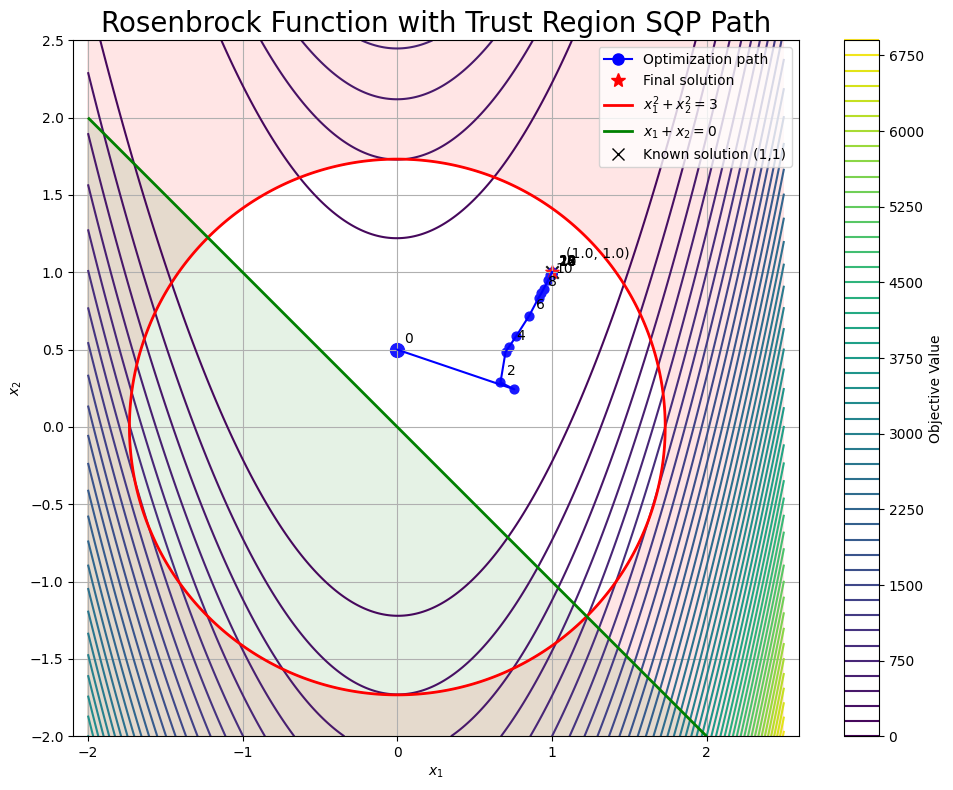

In [23]:
#run with trust region SQP
x0 = np.array([0.0, 0.5])
x_optimal_trust, iterations_trust = sqp_trust_region(x0, rosenbrock_objective, rosenbrock_constraints, 
                                                       max_iter=100, tol=1e-6, delta_0=1.0, use_bfgs=True)
iterations_trust_array = np.array(iterations_trust)
plot_trust = plot_rosenbrock_with_path(iterations_trust_array, title="Rosenbrock Function with Trust Region SQP Path")